# <img src="https://img.icons8.com/dusk/64/000000/mind-map.png" style="height:50px;display:inline"> EE 044165/6 - Technion - Intro to Machine Learning Lab

## Part 1 - Loading the Data, Pre-Processing and Naive Bayes

### <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> Agenda

* Loading the Data
* Data Representation
* Train-Test Separation
* Naive Bayes

#### Notes
* To run a code block, select it (with mouse) and press Ctrl + Enter to run it or Shift + Enter to run it and move on to the next block.
* To get description of functions and classes, run `help(name_of_function)`.
* To dislplay lines in the code block, select the block, press ESC and then 'L'.

In [158]:
# imports for the lab
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from helper_functions import email_pipeline
from tqdm import tqdm

### <img src="https://img.icons8.com/dusk/64/000000/handshake.png" style="height:50px;display:inline"> Get to Know the Data
The data consists of 3,500 real e-mails from Spam Assassing. We will use `pandas` to load and read the data. Then, we will take a look at a sample of the data.

In [159]:
# load the data
email_data = pd.read_csv('./email_data.csv')
print("number of samples: {}".format(len(email_data)))
print("number of spam emails: {}".format(np.sum(email_data.Label == 'S')))
print("number of ham emails: {}".format(np.sum(email_data.Label == 'H')))
# let's look at 15 random samples from it.
email_data.sample(15)

number of samples: 3052
number of spam emails: 501
number of ham emails: 2551


,To,From,Subject,Content,Label
707,FoRK <fork@example.com>,Gregory Alan Bolcer <gbolcer@endeavors.com>,Webex Endeavors,We have a partnership with Webex. We use thei...,H
2120,yyyy@example.com,boingboing <rssfeeds@example.com>,Rats' intestines and pigs' teeth,URL: http://boingboing.net/#85497383\nDate: No...,H
44,fork@example.com,John Hall <johnhall@evergo.net>,Property rights in the 3rd World (De Soto's My...,\n\n> From: fork-admin@xent.com [mailto:fork-a...,H
1918,yyyy-use-perl@example.com,pudge@perl.org,[use Perl] Stories for 2002-10-07,use Perl Daily Newsletter\n\nIn this issue:\n ...,H
2010,yyyy@example.com,scripting <rssfeeds@example.com>,"Jeremy Zawodny on life in Silicon Valley: ""I c...",URL: http://scriptingnews.userland.com/backiss...,H
491,"""Mr. FoRK"" <fork_list@hotmail.com>",Tom <tomwhore@slack.net>,Re: CD player UI for toddlers,"On Wed, 4 Sep 2002, Mr. FoRK wrote:\n--]It'd b...",H
1387,rpm-zzzlist@freshrpms.net,Panu Matilainen <pmatilai@welho.com>,Re: RH 8 no DMA for DVD drive,"On Mon, 7 Oct 2002, Jesse Keating wrote:\n\n> ...",H
2191,yyyy@example.com,diveintomark <rssfeeds@example.com>,Colophon 1,URL: http://diveintomark.org/archives/2002/10/...,H
2340,yyyy@example.com,newscientist <rssfeeds@example.com>,Hurricane Lili closes shuttle Mission Control,"URL: http://www.newsisfree.com/click/-3,847794...",H
286,zzzzteana <zzzzteana@yahoogroups.com>,Tim Chapman <timc@2ubh.com>,[zzzzteana] Worryingly sophisticated bees,Ananova: \nBrazilian bees keep their own 'ins...,H


### <img src="https://img.icons8.com/color/96/000000/transformer.png" style="height:50px;display:inline"> Represent the Data
We will now transform the data into a form which is applicable for the computer, for the algorithms - numbers.

In [160]:
# let's separte the Content and the Label for a sample of the data
data_sample = email_data.sample(15)
X_sample = data_sample['Content'].values
y_sample = data_sample['Label'].values == 'S' # 1 Spam, 0 for Ham

# transform the data
X_sample_augmented = email_pipeline.fit_transform(X_sample)
# let's look at what we got
print(type(X_sample_augmented))
print(X_sample_augmented)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 1)	1
  (0, 4)	2
  (0, 6)	1
  (0, 8)	1
  (0, 13)	1
  (0, 27)	1
  (0, 28)	1
  (0, 35)	1
  (0, 83)	1
  (0, 84)	1
  (0, 85)	1
  (0, 86)	1
  (0, 87)	1
  (0, 88)	1
  (0, 120)	1
  (0, 213)	1
  (0, 214)	1
  (0, 215)	1
  (0, 216)	1
  (0, 217)	1
  (0, 218)	1
  (0, 219)	1
  (0, 220)	1
  (0, 221)	1
  (0, 222)	1
  :	:
  (14, 5)	1
  (14, 6)	2
  (14, 9)	1
  (14, 13)	1
  (14, 14)	1
  (14, 15)	1
  (14, 25)	1
  (14, 27)	1
  (14, 28)	1
  (14, 35)	1
  (14, 36)	1
  (14, 74)	1
  (14, 80)	1
  (14, 83)	1
  (14, 84)	2
  (14, 86)	1
  (14, 87)	1
  (14, 88)	1
  (14, 89)	1
  (14, 119)	3
  (14, 184)	1
  (14, 199)	1
  (14, 206)	1
  (14, 211)	2
  (14, 212)	2


In [161]:
# from sparse to dense
X_sample_augmented = X_sample_augmented.todense()
print(X_sample_augmented)

[[ 0  1  0 ...  0  0  0]
 [ 0  1  1 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 ...
 [76 14  5 ...  0  0  0]
 [29  4  3 ...  0  0  0]
 [31  6  2 ...  0  0  0]]


In [162]:
# let's look at the vocabulary
dictionary = email_pipeline.get_params()['Wordcount to Vector'].vocabulary_
print(dictionary)

{'the': 1, 'to': 2, 'of': 3, 'a': 4, 'in': 5, 'and': 6, 'that': 7, 'is': 8, 'on': 9, '>': 10, 'i': 11, 'have': 12, 'not': 13, 'for': 14, 'be': 15, 'they': 16, 'at': 17, 'alberta': 18, 'thi': 19, 'mail': 20, 'it': 21, 'are': 22, 'but': 23, 'do': 24, 'so': 25, 'with': 26, 'url:': 27, 'date:': 28, 'by': 29, 'than': 30, 'like': 31, 'as': 32, 'provinc': 33, 'govern': 34, '[1]': 35, 'hi': 36, 'my': 37, 'from': 38, 'all': 39, 'more': 40, 'some': 41, 'or': 42, 'will': 43, 'even': 44, 'list': 45, 'hear': 46, 'wrote:': 47, 'there': 48, 'you': 49, 'work': 50, 'onli': 51, 'their': 52, 'would': 53, "i'm": 54, 'never': 55, '-------------------------------------------------------': 56, 'sfnet': 57, 'email': 58, 'sponsor': 59, 'by:thinkgeek': 60, 'welcom': 61, 'geek': 62, 'heaven': 63, 'http://thinkgeekcom/sf': 64, '_______________________________________________': 65, 'an': 66, 'them': 67, 'much': 68, 'which': 69, 'back': 70, 'guido>': 71, 'other': 72, 'canada': 73, 'ha': 74, 'up': 75, 'someth': 76, 

### <img src="https://img.icons8.com/flat_round/64/000000/split.png" style="height:50px;display:inline"> Split the Data
We will now split the data into train and test sets, so we can train and evaluate our algorithms.

In [163]:
def mlab_train_test_split(X, y, test_size=0.2):
    """
    :param X: features
    :param y: labels
    :param test_size: test set size in percentage (0 < test_size < 1)
    :return X_train, X_test, y_train, y_test
    """
    num_train = int((1 - test_size) * X.shape[0])
    rand_gen = np.random.RandomState()
    indices = rand_gen.permutation(len(X))
    X = X[indices]
    y = y[indices]
    
    X_train = X[:num_train]
    y_train = y[:num_train]
    X_test = X[num_train:]
    y_test = y[num_train:]
    
    return X_train, X_test, y_train, y_test

In [164]:
# test your function
X = email_data['Content'].values
y = email_data['Label'].values == 'S' # 1 Spam, 0 for Ham
# split
X_train, X_test, y_train, y_test = mlab_train_test_split(X, y, test_size=0.2)
# transform
X_train_augmented = email_pipeline.fit_transform(X_train)
X_test_augmented = email_pipeline.transform(X_test)

print("num train samples: {}".format(X_train.shape[0]))
print("num test samples: {}".format(X_test.shape[0]))
print("shape after augmentaion: {}".format(X_train_augmented.shape))
print("fraction of spam in the original: {}".format(np.sum(y == 1) / y.shape[0]))
print("fraction of spam in the train set: {}".format(np.sum(y_train == 1) / y_train.shape[0]))

num train samples: 2441
num test samples: 611
shape after augmentaion: (2441, 501)
fraction of spam in the original: 0.16415465268676277
fraction of spam in the train set: 0.16058992216304793


#### Note
Since the function you wrote does not consider the fraction of each class in the set, we will use the `train_test_split` from Scikit-Learn

In [165]:
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# transform
X_train_augmented = email_pipeline.fit_transform(X_train)
X_test_augmented = email_pipeline.transform(X_test)

print("num train samples: {}".format(X_train.shape[0]))
print("num test samples: {}".format(X_test.shape[0]))
print("shape after augmentaion: {}".format(X_train_augmented.shape))
print("fraction of spam in the original: {}".format(np.sum(y == 1) / y.shape[0]))
print("fraction of spam in the train set: {}".format(np.sum(y_train == 1) / y_train.shape[0]))

num train samples: 2441
num test samples: 611
shape after augmentaion: (2441, 501)
fraction of spam in the original: 0.16415465268676277
fraction of spam in the train set: 0.1638672675133142


### <img src="https://img.icons8.com/color/96/000000/rubiks-cube.png" style="height:50px;display:inline"> Naive Bayes
We will now implement the Naive Bayes algorithm, using the Scikit-Learn formulation.
Each ML algorithm has 2 methods:
1. `fit` - Traning stage. the algorithm receives $X_{train}$, $y_{train}$, and learns the parameters to perform classification.
2. `predict` - The algorithm uses the learned parameters to perform prediction on $X_{test}$.


* For the likelihood parameters calculation, you can use the pre-made function `calc_likelihood_params`. Read its description and how to use it.

In [166]:
"""
The following function calculates the likelihood parameters of each distribution. 
Please take some time to understand how it works.
"""

def calc_likelihood_params(X, y, dist_type="gaussian", c=1, num_classes=2):
    """
    Calculate the likelihood P(X|y,theta)
    :param X: features
    :param y: labels
    :param dist_type: type of distribution: "gaussian", "bernoulli", "multinomial", "multinomial_smooth"
    :param c: smoothing parameter for "multinomial_smooth"
    :param num_classes: number of classes
    :return likelihood_params
    """
    params = {'type': dist_type}
    if dist_type == 'gaussian':
        mu_s = []
        sigma_s = []
        for i in range(num_classes):
            x_i = X[y == i]
            mu_s.append(np.mean(x_i, axis=0).reshape(1,-1))
            # sigma^2
            sigma_s.append(np.mean(np.square(x_i - mu_s[i]), axis=0))
        params['mu'] = mu_s
        params['sigma'] = sigma_s
    elif dist_type == 'bernoulli':
        p_s = []
        for i in range(num_classes):
            x_i = X[y == i]
            # change to 0-1
            x_i[x_i > 0] = 1
            p_s.append(np.mean(x_i, axis=0))
        params['p'] = p_s
    elif dist_type == 'multinomial':
        p_s = []
        for i in range(num_classes):
            x_i = X[y == i].todense()
            T = np.sum(x_i)
            p_s.append(np.sum(x_i, axis=0) / T)
        params['p'] = p_s
    elif dist_type == 'multinomial_smooth':
        p_s = []
        for i in range(num_classes):
            x_i = X[y == i].todense()
            T = np.sum(x_i) + c * X.shape[1]
            p_s.append((c + np.sum(x_i, axis=0)) / T)
        params['p'] = p_s
    else:
        print("unknown distribution!")
        return
    return params

In [167]:
"""
Implement the Naive Bayes classifier. Complete the code where you are asked to.
"""

class MlabNaiveBayes():
    "This class implement a Naive Bayes Classifier"
    def __init__(self, dist_type="gaussian", num_classes=2, use_log_prob=False):
        """
        Initialize the classfier
        :param dist_type: type of distribution: "gaussian", "bernoulli", "multinomial", "multinomial_smooth"
        :param num_classes: number of classes
        :param use_log_prob: whether or not to use the log probability instead of the regular probility
        """
        self.dist_type = dist_type
        self.num_classes = num_classes
        self.priors = None  # no priors
        self.likelihood_params = None
        self.use_log_prob = use_log_prob
        self.last_scores = None
        
    def fit(self, X, y):
        """
        Train the classfier
        :param X: features
        :param y: labels
        """
        self.likelihood_params = calc_likelihood_params(X, y, dist_type=self.dist_type)
        num_samples = y.shape[0]
        priors = {}
        for i in range(self.num_classes):
            priors[i] = np.sum(X[y==i].shape[0] / X.shape[0])
        self.priors = priors
        
    def predict(self, X):
        """
        Predict labels for features
        :param X: features
        :return y_pred: predictions
        """
        if self.priors is None or self.likelihood_params is None:
            print("can't call 'predict' before 'fit'")
            return
        if isinstance(X, csr_matrix):
            X = X.todense()
        self.last_scores = []
        y_pred = []
        for sample_i in range(X.shape[0]):
            sample = X[sample_i, :]
            scores = []
            if self.dist_type == 'gaussian':
                mu_s = self.likelihood_params['mu']
                sigma_s = self.likelihood_params['sigma']
                for i in range(self.num_classes):
                    if np.sum(sigma_s[i] == 0) > 0:
                        print("Error: cannot predict with Gaussian distribution, Sigma has zeros")
                        return None
                    
                    likelihood = 1
                    for j in range(X.shape[1]):
                        likelihood *= 1 / (np.sqrt(sigma_s[0][i, j])) * np.exp(-0.5 * (sample[0,j] - mu_s[0][i, j])**2)
                    scores.append(likelihood * self.priors[i])

            elif self.dist_type == 'bernoulli':
                p_s = self.likelihood_params['p']
                # change to 0-1
                sample[sample > 0] = 1
                for i in range(self.num_classes):
                    likelihood = 1
                    for j in range(X.shape[1]):
                        likelihood *= p_s[i]  if (sample[j] > 0) else (1-p_s[i])
                    scores.append(likelihood * self.priors[i])

            elif self.dist_type == 'multinomial' or self.dist_type == 'multinomial_smooth':
                p_s = self.likelihood_params['p']
                for i in range(self.num_classes):
                    if self.use_log_prob:
                        likelihood = np.sum(np.multiply(np.log(p_s[i]), sample), axis=1)
                        scores.append(likelihood + np.log(self.priors[i]))
                    else:
                        
                        likelihood = np.exp(np.sum(np.multiply(np.log(p_s[i]), sample), axis=1))
                        scores.append(likelihood * self.priors[i])
            else:
                print("unknown distribution!")
                return None
            y_pred.append(np.argmax(scores))
            self.last_scores.append(scores)
        self.last_scores = np.array(self.last_scores)
        return y_pred

In [168]:
# let's see it in action for the gaussian case
# create classifier
clf = MlabNaiveBayes(dist_type="gaussian", num_classes=2)
# train on train set
clf.fit(X_train_augmented, y_train)
# predict on test set
y_pred = clf.predict(X_test_augmented)

Error: cannot predict with Gaussian distribution, Sigma has zeros


* OH NO! WHAT HAPPEND??

In [170]:
# let's see it in action for the multinomial case
# create classifier
clf = MlabNaiveBayes(dist_type="multinomial", num_classes=2)
# train on train set
clf.fit(X_train_augmented, y_train)
# predict on test set
y_pred = clf.predict(X_test_augmented)
# calculate the error
error = 1 - np.mean(y_pred == y_test)
print("classification error: {} ({}%)".format(error, error * 100))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in log
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: invalid value encountered in multiply


classification error: 0.8346972176759411 (83.46972176759411%)


In [171]:
# let's look at the posterior values
print("shape of the posterior values: {}".format(clf.last_scores.shape))
# some of them
print(clf.last_scores[:20])

shape of the posterior values: (611, 2, 1, 1)
[[[[0.00000000e+000]]

  [[            nan]]]


 [[[0.00000000e+000]]

  [[            nan]]]


 [[[1.31913682e-253]]

  [[            nan]]]


 [[[0.00000000e+000]]

  [[            nan]]]


 [[[3.19789600e-287]]

  [[            nan]]]


 [[[3.73959936e-154]]

  [[            nan]]]


 [[[7.34933944e-287]]

  [[            nan]]]


 [[[0.00000000e+000]]

  [[            nan]]]


 [[[2.22698461e-029]]

  [[            nan]]]


 [[[0.00000000e+000]]

  [[            nan]]]


 [[[2.39605309e-046]]

  [[            nan]]]


 [[[2.02596902e-109]]

  [[            nan]]]


 [[[0.00000000e+000]]

  [[            nan]]]


 [[[5.90975690e-163]]

  [[            nan]]]


 [[[4.04818484e-136]]

  [[            nan]]]


 [[[1.54204538e-015]]

  [[            nan]]]


 [[[0.00000000e+000]]

  [[            nan]]]


 [[[3.38436742e-145]]

  [[            nan]]]


 [[[3.41148659e-108]]

  [[            nan]]]


 [[[0.00000000e+000]]

  [[            nan

In [172]:
# let's see it in action for the smooth multinomial case
# create classifier
clf = MlabNaiveBayes(dist_type="multinomial_smooth", num_classes=2)
# train on train set
clf.fit(X_train_augmented, y_train)
# predict on test set
y_pred = clf.predict(X_test_augmented)
# calculate the error
error = 1 - np.mean(y_pred == y_test)
print("classification error: {} ({}%)".format(error, error * 100))

classification error: 0.07855973813420625 (7.855973813420625%)


In [173]:
"""
Analyze the effect of train sets of different sizes
"""
num_repeats = 20
test_size = 0.2
train_sizes = [0.1, 0.2, 0.4, 0.8, 1]
test_errors = []
test_errors_std = []

X = email_data['Content'].values
y = email_data['Label'].values == 'S'  # 1 Spam, 0 for Ham


for train_size in train_sizes:
    current_errors = []
    print("current train size: {}".format(train_size))
    for n in tqdm(range(num_repeats)):
        # pre-process
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        num_train = int(train_size * X_train.shape[0])
        X_train = X_train[:num_train]
        y_train = y_train[:num_train]

        clf = MlabNaiveBayes(dist_type="multinomial_smooth", num_classes=2)
        
        # Transform
        X_train_augmented = email_pipeline.fit_transform(X_train)
        X_test_augmented = email_pipeline.transform(X_test)
        
        # train
        clf.fit(X_train_augmented, y_train)
        
        # test
        y_pred = clf.predict(X_test_augmented)
        
        # calculate error
        current_errors.append(1 - np.mean(y_pred == y_test))
    test_errors.append(np.mean(current_errors))
    test_errors_std.append(np.std(current_errors))

current train size: 0.1


100%|██████████| 20/20 [00:45<00:00,  2.28s/it]


current train size: 0.2


100%|██████████| 20/20 [00:57<00:00,  2.82s/it]


current train size: 0.4


100%|██████████| 20/20 [01:22<00:00,  4.04s/it]


current train size: 0.8


100%|██████████| 20/20 [02:13<00:00,  6.68s/it]


current train size: 1


100%|██████████| 20/20 [02:38<00:00,  7.93s/it]


Text(0.5, 1.0, 'Test Error vs. Train Size (N=20 Repeats)')

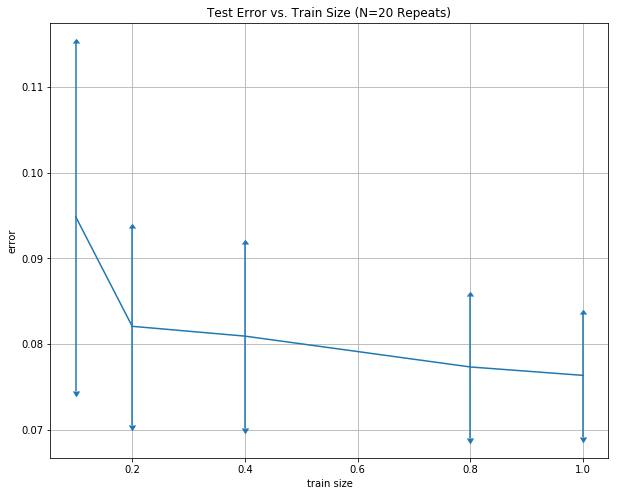

In [174]:
"""
Plot the results
"""
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.errorbar(train_sizes, test_errors, yerr=test_errors_std, uplims=True, lolims=True)
ax.set_xlabel("train size")
ax.set_ylabel("error")
ax.grid()
ax.set_title("Test Error vs. Train Size (N=20 Repeats)")

In [175]:
# let's do the same for the evaluation on the train set
# repeat for train error
num_repeats = 20
train_sizes = [0.1, 0.2, 0.4, 0.8, 1]
train_errors = []
train_errors_std = []

X = email_data['Content'].values
y = email_data['Label'].values == 'S'  # 1 Spam, 0 for Ham


for train_size in train_sizes:
    current_errors = []
    print("current train size: {}".format(train_size))
    for n in tqdm(range(num_repeats)):
        # pre-process
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
        num_train = int(train_size * X_train.shape[0])
        X_train = X_train[:num_train]
        y_train = y_train[:num_train]
        """
        Your Code Here
        """
        clf = MlabNaiveBayes(dist_type="multinomial_smooth", num_classes=2)
        
        # Transform
        X_train_augmented = email_pipeline.fit_transform(X_train)
        
        # train
        clf.fit(X_train_augmented, y_train)
        
        # test
        y_pred = clf.predict(X_train_augmented)
        
        # calculate error
        current_errors.append(1 - np.mean(y_pred == y_train))
    train_errors.append(np.mean(current_errors))
    train_errors_std.append(np.std(current_errors))

current train size: 0.1


100%|██████████| 20/20 [00:12<00:00,  1.55it/s]


current train size: 0.2


100%|██████████| 20/20 [00:26<00:00,  1.33s/it]


current train size: 0.4


100%|██████████| 20/20 [00:52<00:00,  2.68s/it]


current train size: 0.8


100%|██████████| 20/20 [01:45<00:00,  5.29s/it]


current train size: 1


100%|██████████| 20/20 [02:11<00:00,  6.58s/it]


Text(0.5, 1.0, 'Test & Train Error vs. Train Size (N=20 Repeats)')

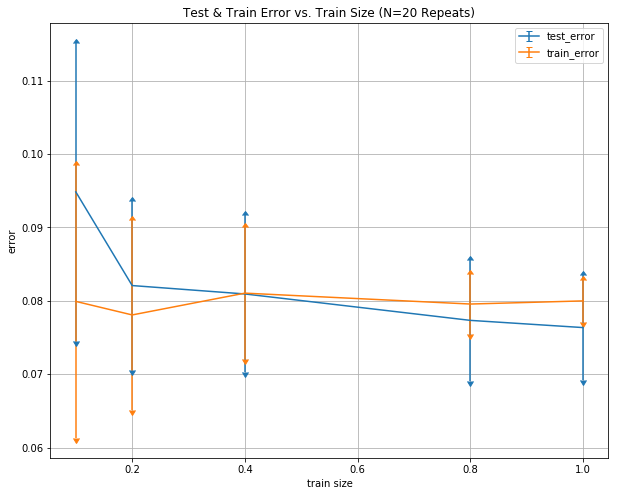

In [176]:
# plot the 2 graphs
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.errorbar(train_sizes, test_errors, yerr=test_errors_std, uplims=True, lolims=True, label="test_error")
ax.errorbar(train_sizes, train_errors, yerr=train_errors_std, uplims=True, lolims=True, label="train_error")
ax.set_xlabel("train size")
ax.set_ylabel("error")
ax.legend()
ax.grid()
ax.set_title("Test & Train Error vs. Train Size (N=20 Repeats)")

In [177]:
# let's see the effect of using log probability
# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# transform
X_train_augmented = email_pipeline.fit_transform(X_train)
X_test_augmented = email_pipeline.transform(X_test)
# create classifier
clf = MlabNaiveBayes(dist_type="multinomial_smooth", num_classes=2, use_log_prob=True)
# train on train set
clf.fit(X_train_augmented, y_train)
# predict on test set
y_pred = clf.predict(X_test_augmented)
# calculate the error
error = 1 - np.mean(y_pred == y_test)
print("classification error: {} ({}%)".format(error, error * 100))
print("the classifier is correct with accuracy of: {:.3f}%".format((1 - error) * 100))

classification error: 0.03436988543371522 (3.436988543371522%)
the classifier is correct with accuracy of: 96.563%


## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/
* Notebook made by <a href="mailto:taldanielm@campus.technion.ac.il">Tal Daniel</a>